In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Preview the data
print(data.head())
print(data.info())


   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 col

In [5]:
# Crear la tabla cruzada
crosstab = pd.crosstab(data['category'], data['isBestSeller'])

# Verificar la estructura de la tabla
print(crosstab.head())

# Calcular la proporción de best-sellers en cada categoría
if 1 in crosstab.columns:  # Verificar que la columna 1 exista
    crosstab['Proportion'] = crosstab[1] / crosstab.sum(axis=1)
else:
    print("La columna '1' no está en la tabla cruzada. Verifica los datos.")
    crosstab['Proportion'] = 0  # Prevenir errores si no hay datos de best-sellers

# Ordenar por proporción de productos más vendidos en orden descendente
sorted_crosstab = crosstab.sort_values('Proportion', ascending=False)

print(sorted_crosstab)


isBestSeller                   False  True 
category                                   
3D Printers                      247      1
3D Printing & Scanning          4065      2
Abrasive & Finishing Products    245      5
Action Cameras                  1696      1
Adapters                         251      3
La columna '1' no está en la tabla cruzada. Verifica los datos.
isBestSeller                   False  True  Proportion
category                                              
eBook Readers & Accessories      246     0           0
3D Printers                      247     1           0
3D Printing & Scanning          4065     2           0
Abrasive & Finishing Products    245     5           0
Action Cameras                  1696     1           0
...                              ...   ...         ...
Ballet & Dancing Footwear       3238     2           0
Bakeware                         233     6           0
Baby & Toddler Toys             9332    24           0
Baby                   

In [ ]:
#pip install scipy


  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/aa/7d/43ab67228ef98c6b5dd42ab386eae2d7877036970a0d7e3dd3eb47a0d530/scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 459.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.4/44.5 MB 11.5 MB/s eta 0:00:04
   -- ------------------------------------- 2.7/44.5 MB 33.9 MB/s eta 0:00:02
   -- ------------------------------------- 2.8/44.5 MB 35.3 MB/s eta 0:00:02
   ------ --------------------------------- 7.0/44.5 MB 40.7 MB/s eta 0:00:01
   -------- ------------------------------- 9.7/44.5 MB 47.8 MB/s eta 0:00:01
   ----------- ---------------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from scipy.stats import chi2_contingency

# Ejecutar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data['category'], data['isBestSeller']))

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")


Estadístico Chi-cuadrado: 36540.20270061387
P-valor: 0.0
Grados de libertad: 295


In [9]:
import numpy as np

# Calcular el valor de Cramér's V
n = data.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(pd.crosstab(data['category'], data['isBestSeller']).shape) - 1)))

print(f"Valor de Cramér's V: {cramers_v}")


Valor de Cramér's V: 0.1222829439760564


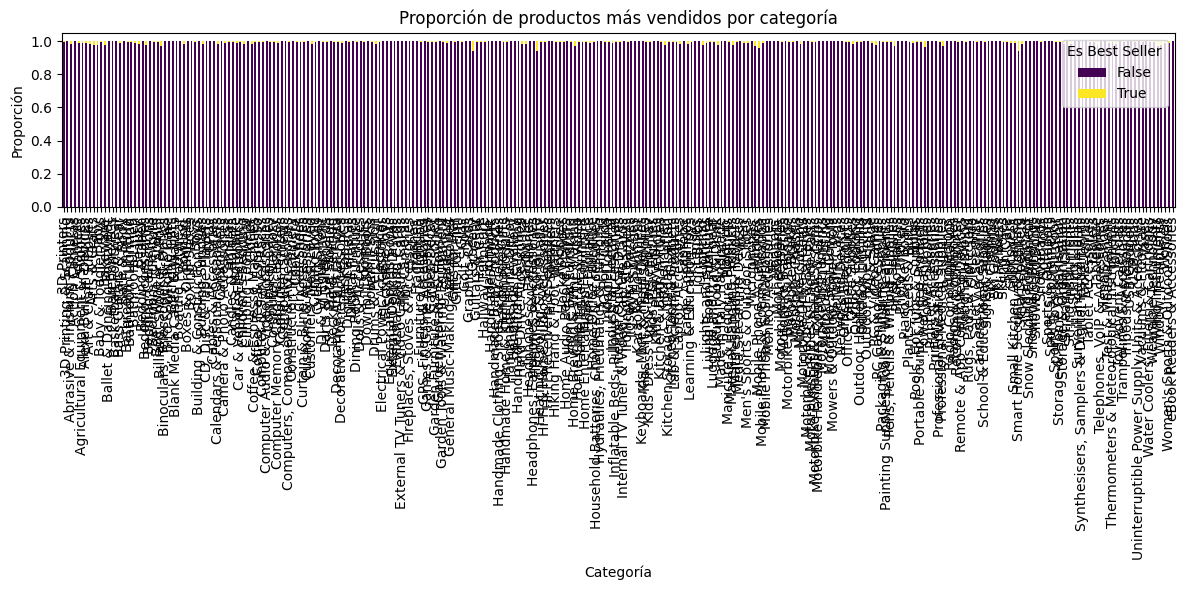

In [10]:
import matplotlib.pyplot as plt

# Preparar los datos para el gráfico
category_counts = pd.crosstab(data['category'], data['isBestSeller'], normalize='index')

# Crear gráfico de barras apilado
category_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Proporción de productos más vendidos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Proporción')
plt.legend(title='Es Best Seller', loc='upper right')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# Calculate the IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
filtered_data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

print(f"Original dataset size: {len(data)}")
print(f"Filtered dataset size: {len(filtered_data)}")


Original dataset size: 2443651
Filtered dataset size: 2115963


C:\Users\Ema\AppData\Local\Temp\ipykernel_19440\2006695142.py:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=top_20_data, x='category', y='price', scale='width')


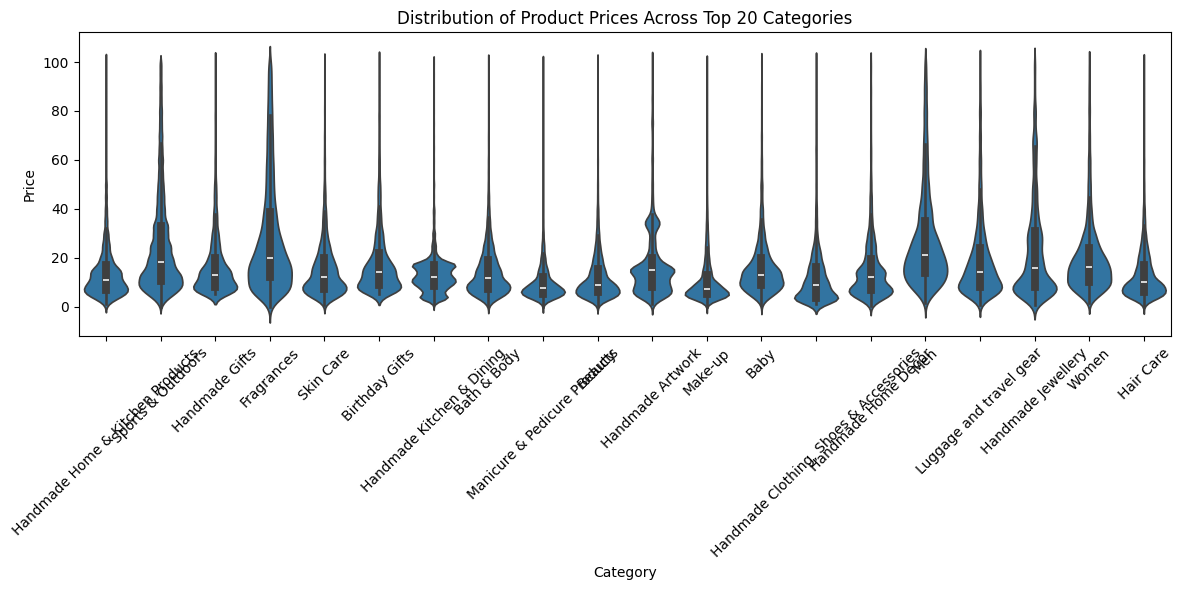

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 20 categories by count
top_20_categories = filtered_data['category'].value_counts().head(20).index

# Filter data for top 20 categories
top_20_data = filtered_data[filtered_data['category'].isin(top_20_categories)]

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=top_20_data, x='category', y='price', scale='width')
plt.title('Distribution of Product Prices Across Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


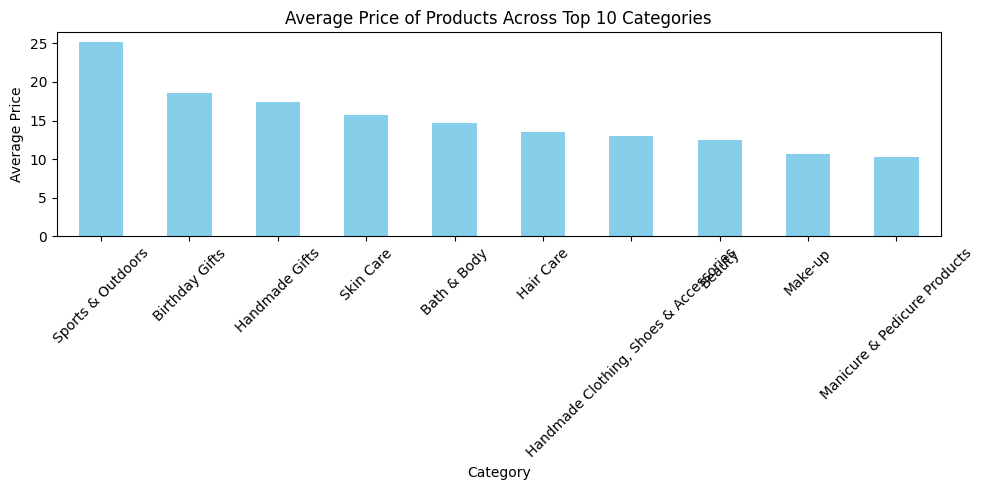

In [13]:
# Calculate average price for each category
avg_price_by_category = filtered_data.groupby('category')['price'].mean()

# Top 10 categories by count
top_10_categories = filtered_data['category'].value_counts().head(10).index

# Filter the averages for the top 10 categories
top_10_avg_prices = avg_price_by_category[top_10_categories]

# Plot bar chart
plt.figure(figsize=(10, 5))
top_10_avg_prices.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Price of Products Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Ema\AppData\Local\Temp\ipykernel_19440\3359599556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_10_data, x='category', y='stars', palette='pastel')


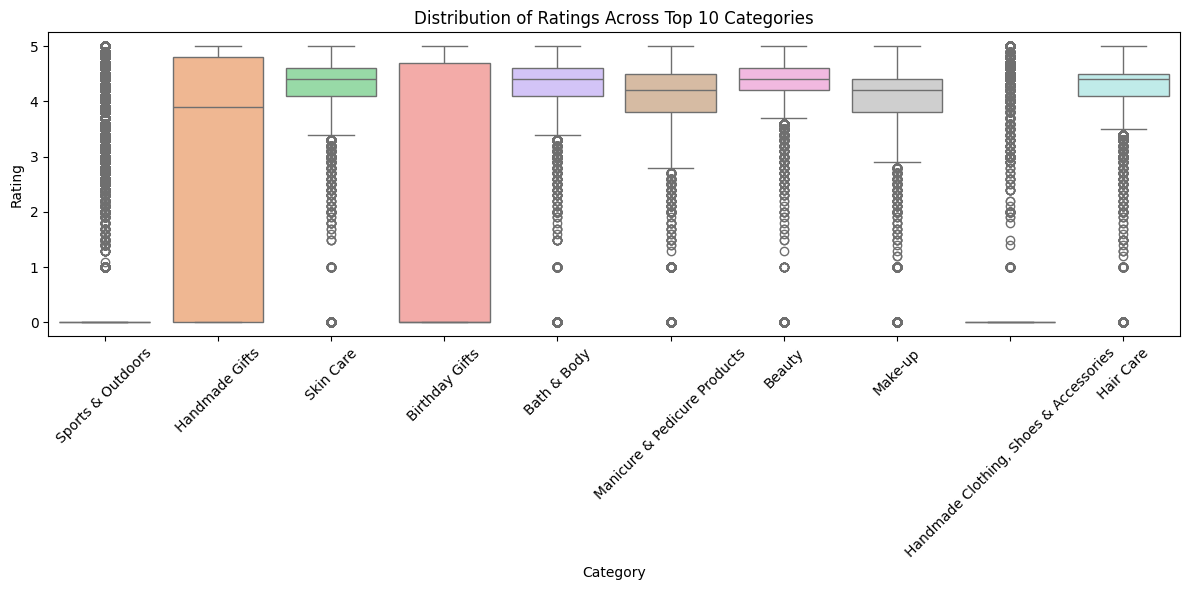

In [14]:
# Filter data for top 10 categories
top_10_data = filtered_data[filtered_data['category'].isin(top_10_categories)]

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_10_data, x='category', y='stars', palette='pastel')
plt.title('Distribution of Ratings Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# Calculate the Pearson correlation coefficient between price and stars
correlation = filtered_data['price'].corr(filtered_data['stars'])
print(f"Correlation between price and stars: {correlation}")


Correlation between price and stars: -0.07767299878181444


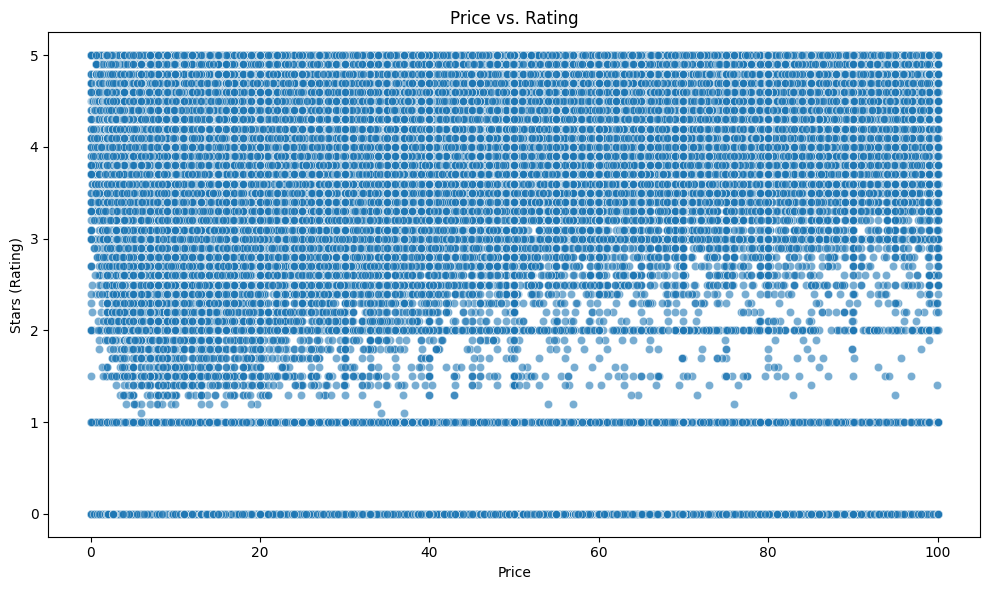

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of price vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='price', y='stars', alpha=0.6)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Stars (Rating)')
plt.tight_layout()
plt.show()


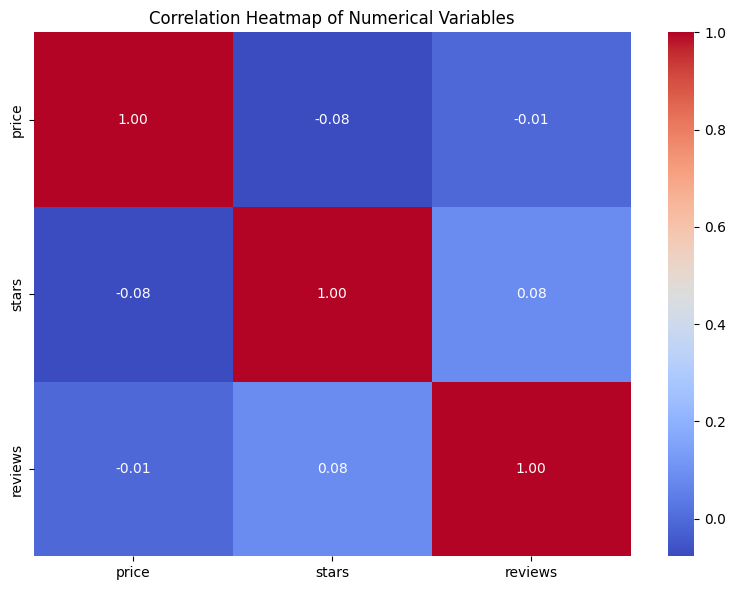

In [17]:
import seaborn as sns

# Select numerical columns for the heatmap
numerical_data = filtered_data[['price', 'stars', 'reviews']]

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()


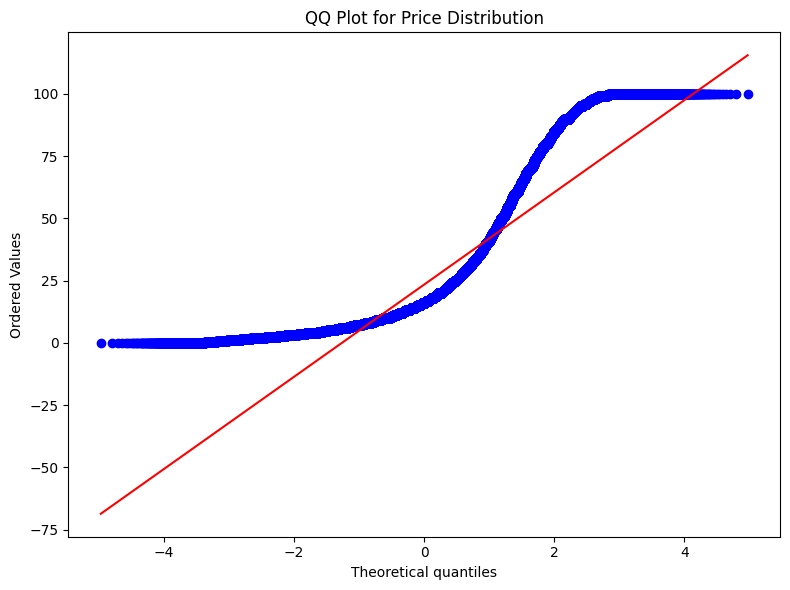

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# QQ plot for price distribution
plt.figure(figsize=(8, 6))
stats.probplot(filtered_data['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Price Distribution')
plt.tight_layout()
plt.show()
